# Predicting Churn Rates

## Introduction

Churn rates, in a business sense, provide a measure of how many customers stop doing business/ stop subscribing to a product. As this would mean the inability to retain revenue, companies would want to minimise the churn rate. One way of doing so would be to identify customers with a high potential to churn, and try to retain them by providing promos, discounts, etc.

Today, we're going to look at this [dataset](https://www.kaggle.com/blastchar/telco-customer-churn) from kaggle and see if we can apply machine learning to identify customers with a potential to churn.

### Importing the data

In [1]:
import pandas as pd
import numpy as np

Data = pd.read_csv('TelcoChurn.csv')
Data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The dataset has 7043 rows and 21 columns, with the following names & types.

In [2]:
Data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
Data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Some description of the dataset can be found below:
- customerID: ID of customer
- gender: Gender of customer
- SeniorCitizen: Whether the customer is a senior citizen (1 for yes and 0 for no)
- Partner: Whether the customer has a partner (Yes or No)
- Dependents: Whether the customer has dependent(s) (Yes or No)
- tenure: Customer's tenure in months
- PhoneService: Whether the customer has a phone service (Yes or No)
- MultipleLines: Whether the customer has multiple phone lines (Yes, No, or No phone service)
- InternetService: The customer's internet service (DSL, Fiber optic, or no)
- OnlineSecurity: Whether the customer has online security (Yes, No, or No internet service)
- OnlineBackup: Whether the customer has online backup (Yes, No, or No internet service)
- DeviceProtection: Whether the customer has device protection (Yes, No, or No internet service)
- TechSupport: Whether the customer has tech support (Yes, No, or No internet service)
- StreamingTV: Whether the customer has streaming TV (Yes, No, or No internet service)
- StreamingMovies: Whether the customer streams movie (Yes, No, or No internet service)
- Contract: Contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing (Yes or No)
- PaymentMethod: The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The customer's monthly charges
- TotalCharges: The customer's total charges
- Churn: Whether the customer churned (Yes or No)

Interestingly, we observe that the 'TotalCharges' column has the type 'object'. This seems inappropriate as they are numerical values. So, we'll convert it.

In [4]:
Data['TotalCharges'] = pd.to_numeric(Data['TotalCharges'], errors = 'coerce')

Then, we check if there are any missing values in the dataset.

In [5]:
Data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As there are 7043 rows and only 11 missing values, we can simply drop those values and use the other complete rows.

In [6]:
Data.dropna(inplace = True)

Now, let's do some checkings on our dataset. The 'customerID' column must contain unique values. Let's check if there are any duplicates.

In [7]:
Unique_vals = ['customerID']

for features in Unique_vals:
    Col = Data[features]
    Length = len(Col)
    Unique = len(set(Col))
    if (Length/Unique) == 1:
        print('Values in the column {} are unique. No duplicates found.\n'.format(features))
    else:
        s = Train[features].value_counts()
        print('Values in the column {} are not unique. Duplicates and frequencies:'.format(features))
        print(s.where(s>1).dropna())
        print('\n')

Values in the column customerID are unique. No duplicates found.



Then, we'll observe the other columns.

In [8]:
Categorical_vals = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 
                    'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'Churn']

for features in Categorical_vals:
    print('Values for column {}: '.format(features), set(Data[features]),', Length: ',len(set(Data[features])),'\n')


Values for column gender:  {'Female', 'Male'} , Length:  2 

Values for column Partner:  {'Yes', 'No'} , Length:  2 

Values for column Dependents:  {'Yes', 'No'} , Length:  2 

Values for column PhoneService:  {'Yes', 'No'} , Length:  2 

Values for column MultipleLines:  {'Yes', 'No', 'No phone service'} , Length:  3 

Values for column InternetService:  {'Fiber optic', 'No', 'DSL'} , Length:  3 

Values for column OnlineSecurity:  {'Yes', 'No', 'No internet service'} , Length:  3 

Values for column OnlineBackup:  {'Yes', 'No', 'No internet service'} , Length:  3 

Values for column DeviceProtection:  {'Yes', 'No', 'No internet service'} , Length:  3 

Values for column TechSupport:  {'Yes', 'No', 'No internet service'} , Length:  3 

Values for column StreamingTV:  {'Yes', 'No', 'No internet service'} , Length:  3 

Values for column StreamingMovies:  {'Yes', 'No', 'No internet service'} , Length:  3 

Values for column Contract:  {'One year', 'Two year', 'Month-to-month'} , Length

In [9]:
Integer_vals = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

print('Summary for numerical features: \n', Data[Integer_vals].describe()) 

Summary for numerical features: 
        SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


## Exploratory Data Analysis

Now, let's perform some exploratory data analysis. We'll first look at the numerical columns.

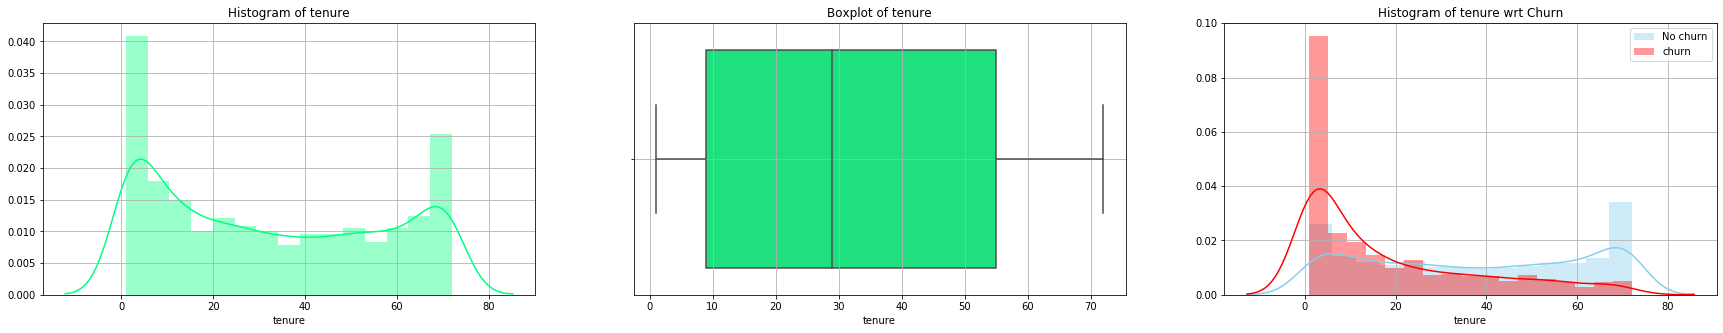

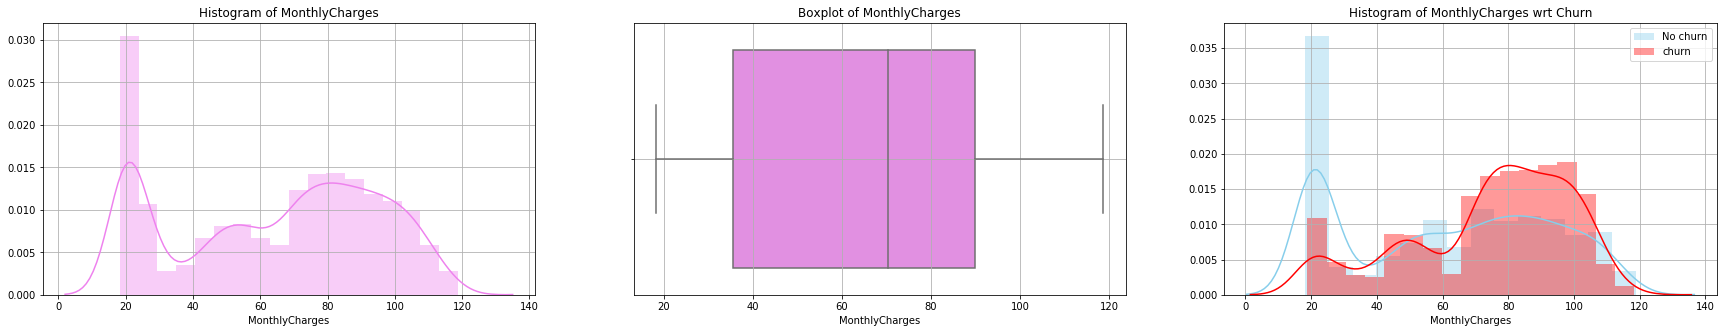

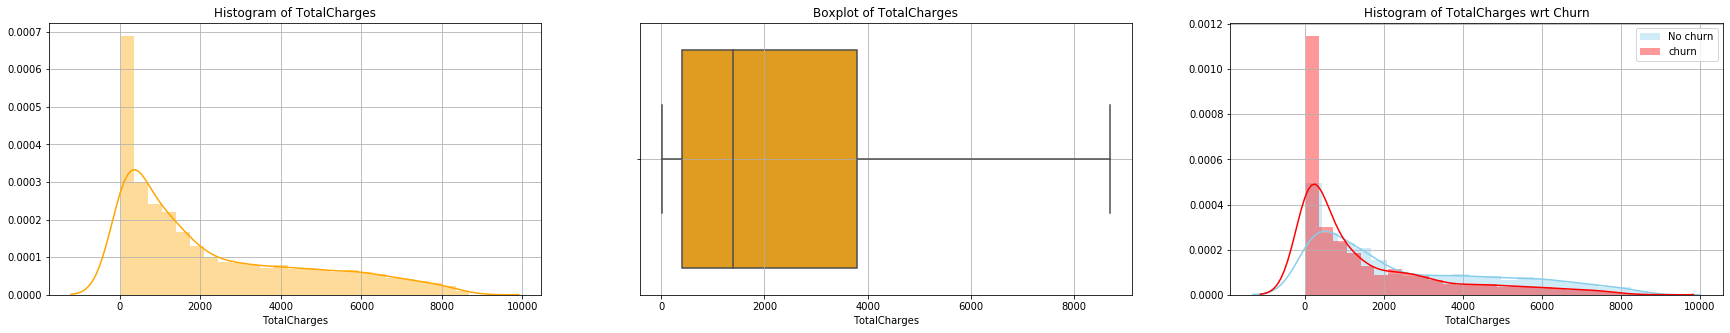

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['springgreen', 'violet', 'orange']

i = 0
for feature in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    
    fig = plt.figure(figsize = (30,5))
    
    ax = fig.add_subplot(1, 3, 1)
    sns.distplot(Data[feature], color = colors[i])
    plt.grid()
    plt.title('Histogram of {}'.format(feature))
    
    ax = fig.add_subplot(1,3,2)
    sns.boxplot(Data[feature], color = colors[i])
    plt.grid()
    plt.title('Boxplot of {}'.format(feature))
    
    Churn_df = Data[Data['Churn'] == 'Yes']
    No_churn_df = Data[Data['Churn'] == 'No']

    ax = fig.add_subplot(1,3,3)
    sns.distplot(No_churn_df[feature], color = 'skyblue', label = 'No churn')
    sns.distplot(Churn_df[feature], color = 'red', label = 'churn')
    plt.title('Histogram of {} wrt Churn'.format(feature))
    plt.grid()
    plt.legend()
    
    i = i + 1
    
    plt.show()

Observations:
- Customers who have stayed longer were less likely to churn.
- Customers with higher monthly charges are more likely to churn. But interestingly, customers who paid higher total charges were less likely to churn.

<Figure size 720x1440 with 0 Axes>

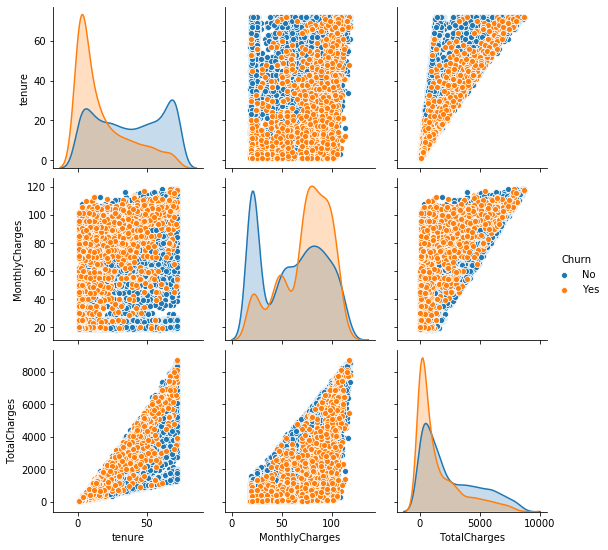

In [11]:
plt.figure(figsize = (10, 20))

sns.pairplot(Data, vars = ['tenure', 'MonthlyCharges', 'TotalCharges'], hue = 'Churn')
plt.show()

Observations:
- There is some correlation between tenure and total charges.
- There is some correlation between total charges and monthly charges.

Now, let's take a look at the categorical variables.

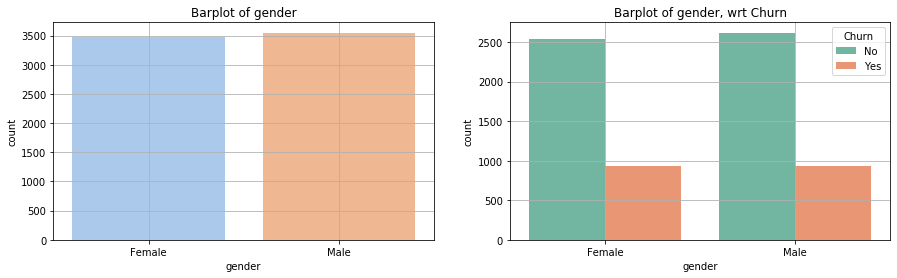

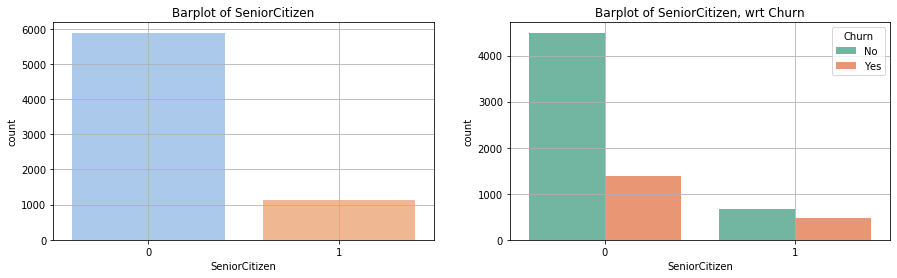

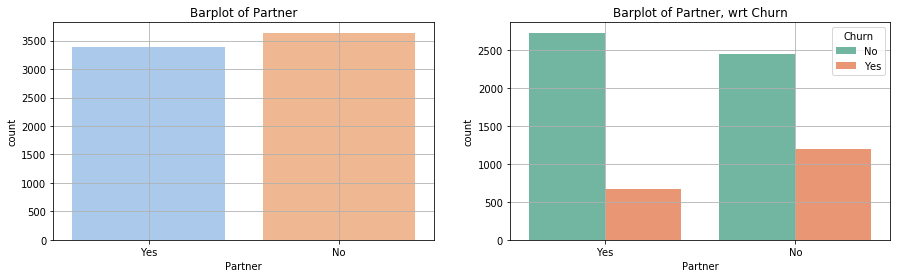

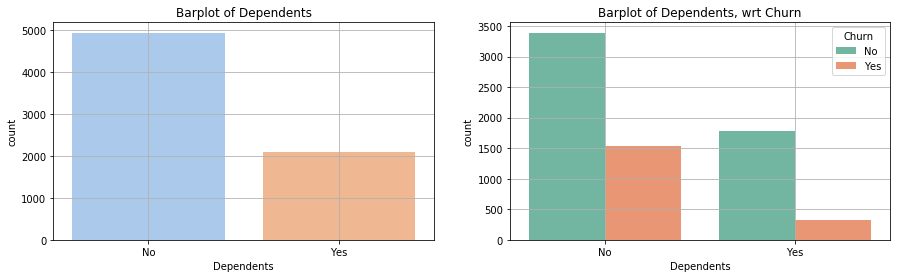

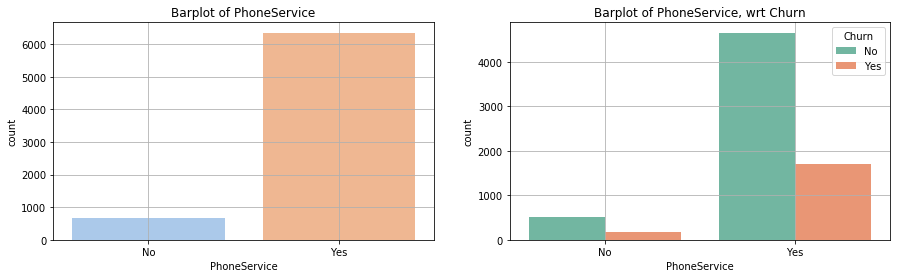

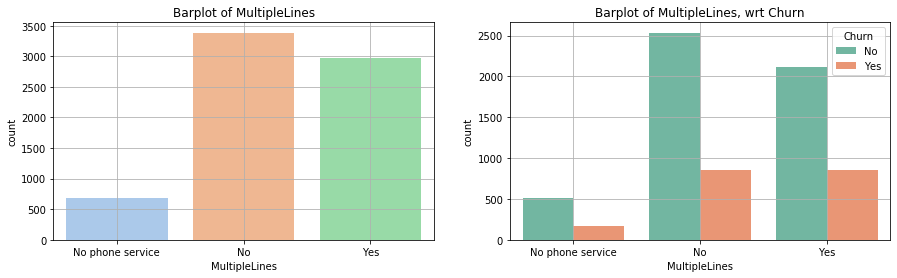

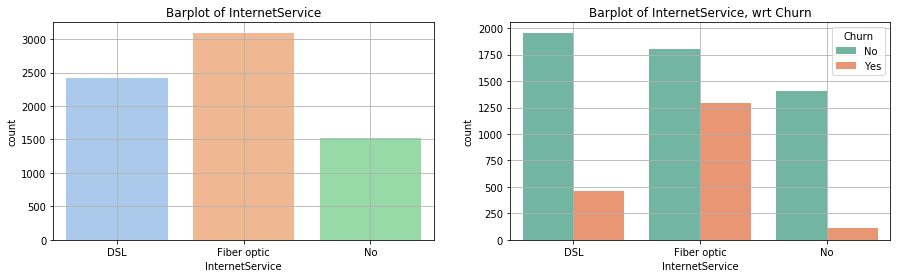

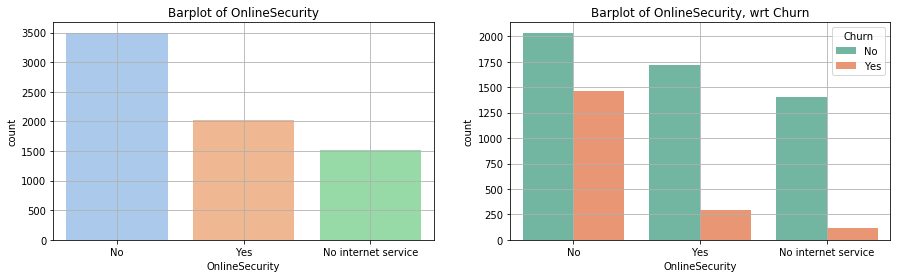

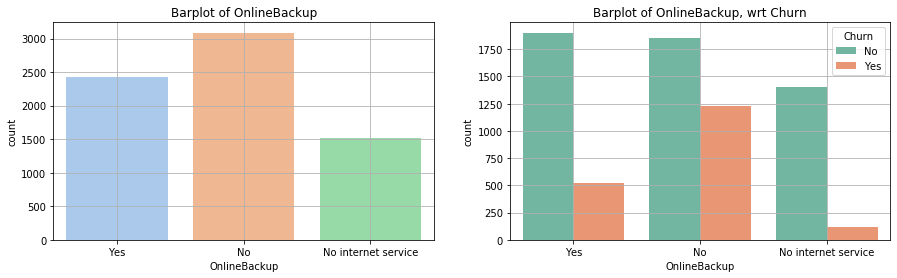

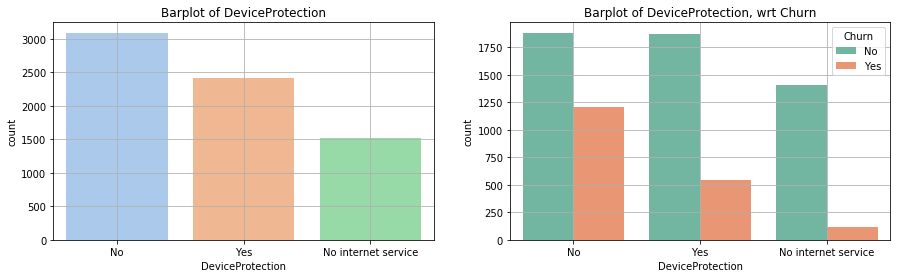

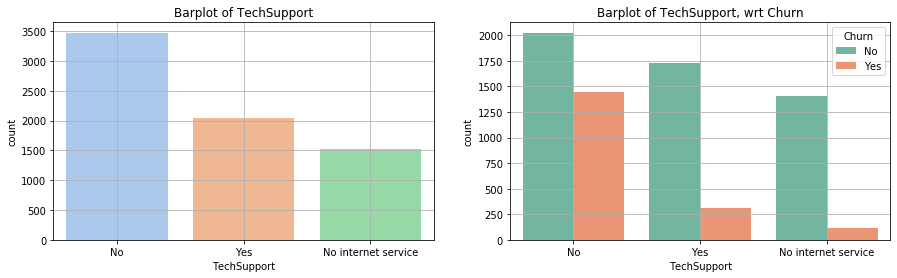

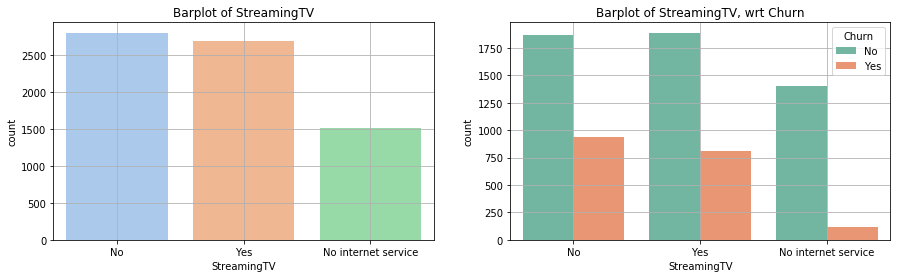

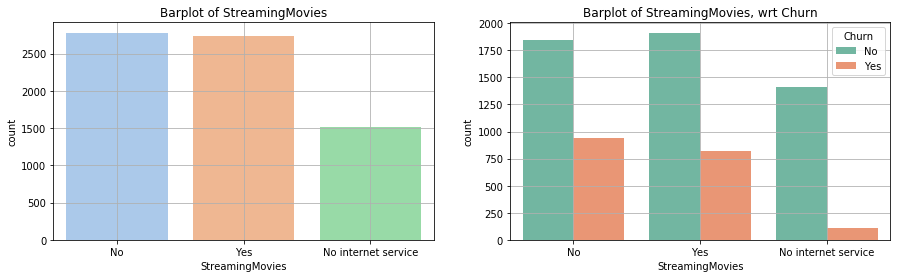

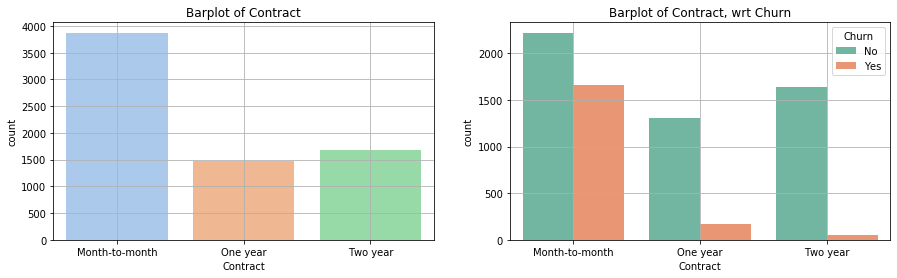

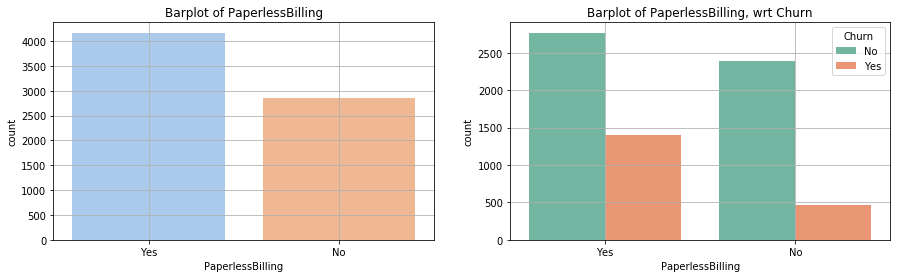

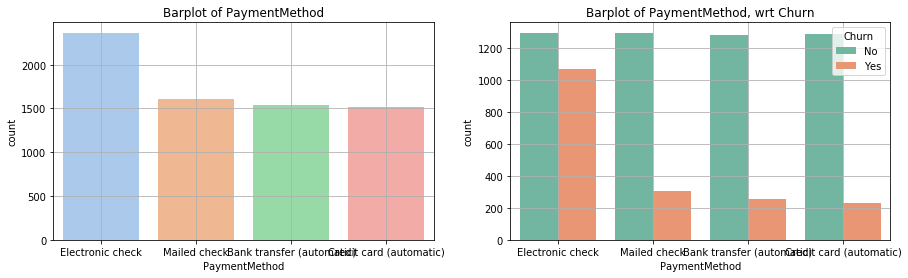

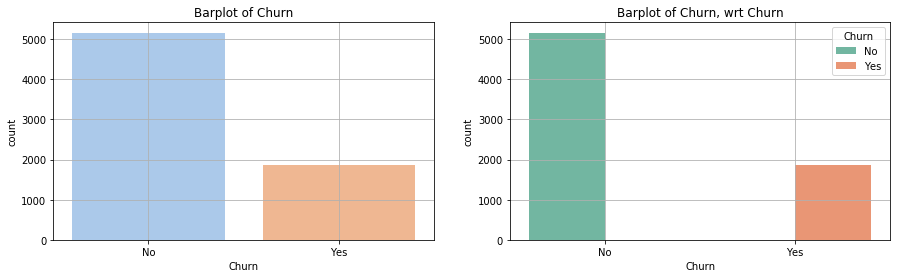

In [12]:
Cats = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
        'Contract', 'PaperlessBilling','PaymentMethod', 'Churn']

for features in Cats:
    fig = plt.figure(figsize = (15,4))
    
    ax = fig.add_subplot(1, 2, 1)
    sns.countplot(x = features, data = Data, palette = 'pastel')
    plt.title('Barplot of {}'.format(features))
    plt.grid()
    
    ax = fig.add_subplot(1, 2, 2)
    sns.countplot(x = features, hue = 'Churn', data = Data, palette = 'Set2')
    plt.title('Barplot of {}, wrt Churn'.format(features))
    plt.grid()
    plt.show()

Observations:
- Male and female customers were equally likely to churn.
- Senior citizens, and customers without partner or dependents appear to be more likely to churn.
- Among other internet service, fiber optic customers were most likely to churn.
- Customers without added internet features (online security/ backup, device protection, tech support) were more likely to churn.
- Customers on month to month contract were more likely to churn.
- Customers paying with electronic check were more likely to churn.
- The dataset is imbalanced.

Finally, let's do some violinplots to see if we can observe any other trends.

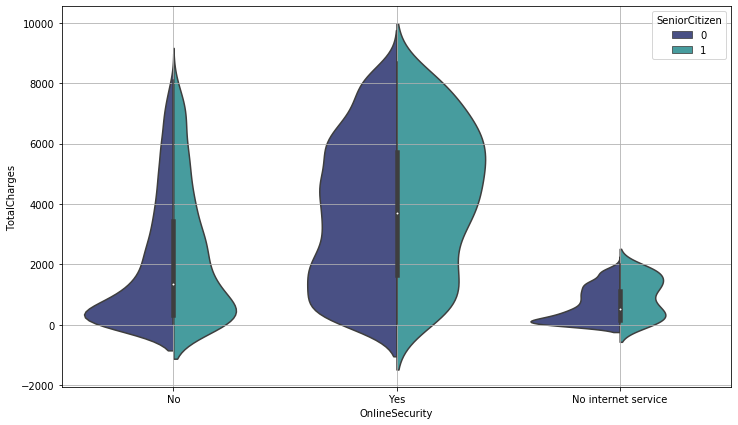

In [13]:
fig = plt.figure(figsize=(12, 7))
sns.violinplot(x = 'OnlineSecurity', y = 'TotalCharges', hue = 'SeniorCitizen',
               data = Data, split = True, palette = 'mako')
plt.grid()
plt.show()

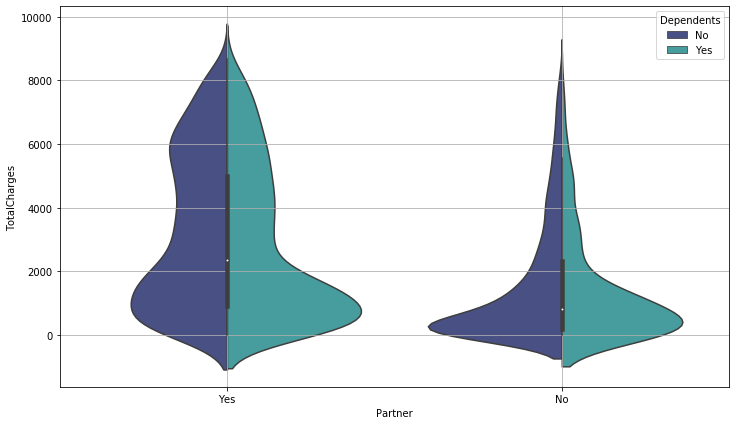

In [14]:
fig = plt.figure(figsize=(12, 7))
sns.violinplot(x = 'Partner', y = 'TotalCharges', hue = 'Dependents',
               data = Data, split = True, palette = 'mako')
plt.grid()
plt.show()

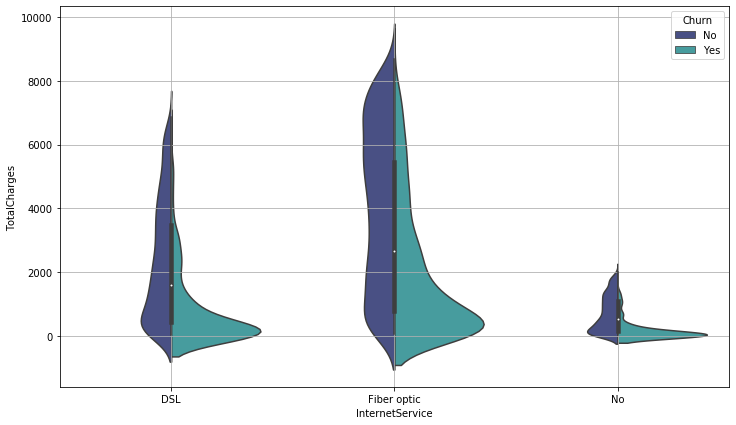

In [15]:
fig = plt.figure(figsize=(12, 7))
sns.violinplot(x = 'InternetService', y = 'TotalCharges', hue = 'Churn',
               data = Data, split = True, palette = 'mako')
plt.grid()
plt.show()

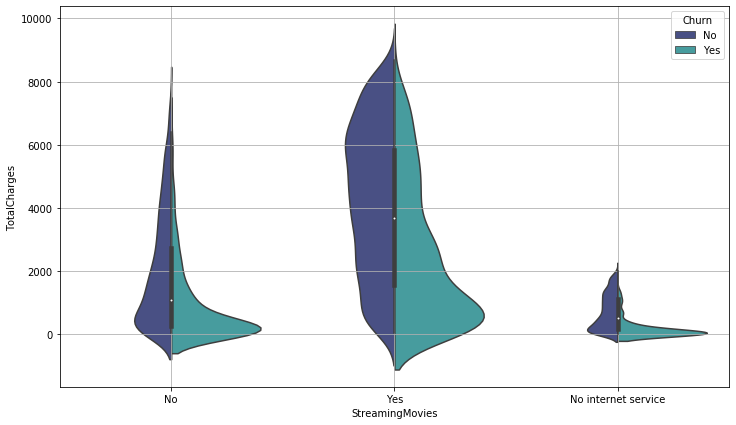

In [16]:
fig = plt.figure(figsize=(12, 7))
sns.violinplot(x = 'StreamingMovies', y = 'TotalCharges', hue = 'Churn',
               data = Data, split = True, palette = 'mako')
plt.grid()
plt.show()

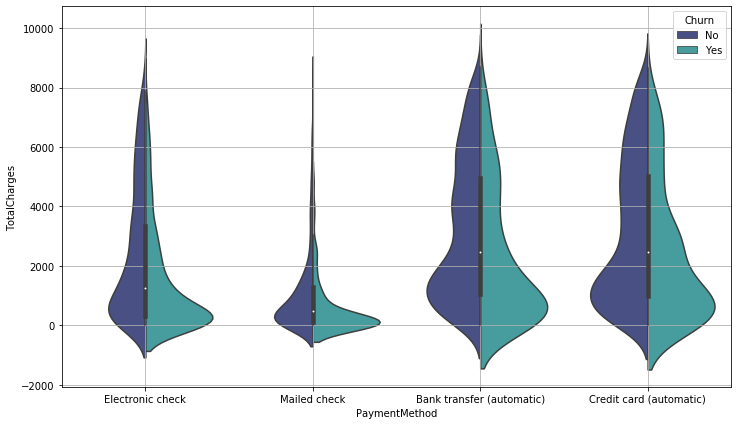

In [17]:
fig = plt.figure(figsize=(12, 7))
sns.violinplot(x = 'PaymentMethod', y = 'TotalCharges', hue = 'Churn',
               data = Data, split = True, palette = 'mako')
plt.grid()
plt.show()

Some more findings:
- Customers paying for additional features like streaming movies on a higher fee were more likely to churn.
- Customers with higher total charges prefer bank transfer or credit card payment.

## Modelling

Now, we're done with the EDA and can move to the next step, which is the modelling part. First, we'll drop the customer ID column and preprocess the data.

In [18]:
Data.drop('customerID', axis = 1, inplace = True)

For categorical columns with only 2 input options, we'll use label encoder to preprocess them. Whereas for those with more than 2 options, we'll use one hot encoding. The reason for this is because we wouldn't want to create a misinterpretation where two inputs are more similar than the others.

In [19]:
from sklearn.preprocessing import LabelEncoder

LE_Features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for feature in LE_Features:
    Data[feature] = LabelEncoder().fit_transform(Data[feature])
    
#gender: female = 0, male = 1
#Partner: no = 0, yes = 1
#Dependents: no = 0, yes = 1
#Phone service: no = 0, yes = 1
#PaperlessBilling: no = 0, yes = 1
#Churn: No = 0, yes = 1

In [20]:
from sklearn.preprocessing import OneHotEncoder

OHE_Features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

for feature in OHE_Features:
    Dummy = pd.get_dummies(Data[feature], prefix = feature)
    Data = pd.concat([Data, Dummy], axis = 1)
    Data.drop(feature, axis = 1, inplace = True)

Data.head(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


Done with the categorical columns, we'll now seperate the target values (in this case the churn column), from the other features. Next, we'll split the data into training and test set and standardise the numerical columns with respect to the values in the training set.

In [21]:
y = Data['Churn']
X = Data.drop('Churn', axis = 1)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

In [23]:
pd.options.mode.chained_assignment = None

Standardised_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in Standardised_features:
    Min = X_train[feature].min()
    Max = X_train[feature].max()
    
    X_train[feature] = (X_train[feature] - Min)/(Max - Min)
    X_test[feature] = (X_test[feature] - Min)/(Max - Min)

In [24]:
X_train.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1176,0,0,0,0,0.070423,1,1,0.911940,0.075081,0,...,0,0,1,1,0,0,0,1,0,0
4241,0,0,1,1,0.295775,1,0,0.426866,0.161926,1,...,1,0,0,1,0,0,0,0,0,1
314,1,0,0,0,0.056338,1,1,0.620398,0.045782,1,...,1,0,0,1,0,0,0,0,1,0
3722,1,0,0,1,0.309859,0,0,0.222886,0.107154,0,...,1,0,0,0,1,0,1,0,0,0
6528,1,0,1,1,0.971831,1,0,0.020896,0.166086,1,...,0,1,0,0,0,1,0,1,0,0


At this point, all the columns have been preprocessed and the data is ready for model fitting. But before that, we just have one more thing to do. Recall that previously, we observed that our data is imbalanced. To prevent having a model that would be biased towards the majority class, we should undersample/ oversample our dataset. In reality, oversampling might result in a better performance since all information is retained. However, here, we've decided to undersample our data instead to reduce the computation time.

In [25]:
from imblearn.under_sampling import RandomUnderSampler

X_res, y_res = RandomUnderSampler(random_state = 1).fit_resample(X_train, y_train)

We'll first use a logistic regression on the data. It is a simple and in most cases, a realiable algorithm.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Log_model = LogisticRegression(max_iter = 1000).fit(X_res, y_res)
y_pred_lr = Log_model.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.75

Looking at the accuracy, one might think that this model performs quite well. However, recalling the imbalanced dataset problem, we should reconsider whether accuracy should be our go-to scoring metric in this case. Perhaps, in this case, recall or precision might be a better metric. We'll first use recall.

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       525
           1       0.51      0.84      0.63       179

    accuracy                           0.75       704
   macro avg       0.72      0.78      0.72       704
weighted avg       0.82      0.75      0.77       704



Fortunately, it does seem that the logistic regression model performs quite well, scoring a recall of 0.84. Now let's see if we can further improve the model by tuning the hyperparameter.

### Hyperparameter tuning for recall

In [28]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

Log_model = LogisticRegression(max_iter = 1000)

grid_values = {'C':[0.001,0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l2']}

cross_validation = StratifiedKFold(n_splits = 5)

grid_log_model = GridSearchCV(Log_model, param_grid = grid_values, scoring = 'recall', cv = cross_validation)
grid_log_model.fit(X_res, y_res)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'penalty': ['l2']},
             scoring='recall')

In [29]:
grid_log_model.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [30]:
from sklearn.metrics import classification_report

y_pred_lr = grid_log_model.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77       525
           1       0.46      0.85      0.59       179

    accuracy                           0.70       704
   macro avg       0.69      0.75      0.68       704
weighted avg       0.81      0.70      0.72       704



Using hyperparameter tuning, we managed to improve recall to 0.85 by using a c parameter (regularisation) of 0.001 with an l2 penalty (ridge).

Now, let's see if we can get an even better model using other classifiers.

In [31]:
# Your code here
from sklearn.svm import SVC

Svm_model = SVC()

grid_values2 = {'kernel': ['linear'], 'C':[0.001, 0.01, 0.1, 1, 10, 100]}
cross_validation = StratifiedKFold(n_splits = 5)

grid_svm_model = GridSearchCV(Svm_model, param_grid = grid_values2, scoring = 'recall', cv = cross_validation)
grid_svm_model.fit(X_res, y_res)

res = np.array(grid_svm_model.cv_results_['mean_test_score'].reshape(6,1))

In [32]:
y_pred_svm = grid_svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      0.63      0.75       525
           1       0.45      0.89      0.60       179

    accuracy                           0.69       704
   macro avg       0.70      0.76      0.67       704
weighted avg       0.82      0.69      0.71       704



Great! Using a linear svm, we managed to further improve the recall to 0.89. This means that we're able to identify 89% of the customers with a potential to churn, and can launch a marketing campaign to try and retain them.

Finally, let's try one more algorithm, a gradient boosted model using XGBoost.

In [33]:
from xgboost import XGBClassifier

grid_values3 = {'max_depth': [1, 2, 3, 4, 5, 6],
                'n_estimators' : [2, 3, 5, 10, 15, 20]}

gbm = XGBClassifier()

cross_validation = StratifiedKFold(n_splits = 5)

grid_xgb_model = GridSearchCV(gbm, param_grid = grid_values3,scoring = "recall", cv = cross_validation)
grid_xgb_model.fit(X_res, y_res)

print("Best parameters found: ", grid_xgb_model.best_params_)

Best parameters found:  {'max_depth': 1, 'n_estimators': 2}


In [34]:
from sklearn.metrics import classification_report

y_pred_xgb = grid_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.53      0.68       525
           1       0.40      0.91      0.55       179

    accuracy                           0.63       704
   macro avg       0.67      0.72      0.62       704
weighted avg       0.80      0.63      0.65       704



This model performs even better, scoring a recall of 0.91. Clearly, this model outperforms the other 2 models and should be used to find customers with a potential to churn.

### The case for precision

Previously, we used recall as the scoring metric for our learning algorithms. This is fine, if the company wants to find as many customers with the potential to churn. However, if the company wants to be as accurate as possible when identifying churn-potential customers, then the above steps can be repeated, with the scoring metric changed to "precision". 

## Conclusion

The problem analysed here was to identify customers with higher churn probabilities. After preprocessing and undersampling our data, we looked at 3 different models, the logistic regression, linear svm, and xgb classifier. Opting to use recall as our metric, the xgb model eventually performed best, achieving a recall of 0.91. This implies that out of all customers that are expected to churn, we can identify approximately 91% of them. This will truly come helpful to a company looking to launch a marketing campaign to retain its customers.